<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/Kaggle_obesity_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Your Goal: The goal of this competition is to use various factors
# to predict obesity risk in individuals, which is related to cardiovascular disease.
# Good luck!

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df_train = pd.read_csv('/content/obesity_risk_data/train.csv')
df_test = pd.read_csv('/content/obesity_risk_data/test.csv')
# df_test = pd.read_csv('/content/obesity_risk_data/sample_submission.csv')

print(f'The train dataset has {df_train.shape[0]}, the testset has {df_test.shape[0]}')

The train dataset has 20758, the testset has 13840


In [17]:
display('Train:', df_train.head(10))
display('Test:',df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [18]:
df_train.describe().to_csv('output.csv', index=False)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [21]:
from tabulate import tabulate
data = [
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables"],
    ["NCP", "Number of main meals"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily"],
    ["CALC", "Consumption of alcohol"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency"],
    ["TUE", "Time using technology devices"],
    ["MTRANS", "Transportation used"]
]
headers = ["Abbreviation", "Full Form"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |


In [22]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [23]:
summary(df_train.drop(columns=["id"])).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,0,2,nan,nan,nan,nan,Female,10422
Age,float64,0,0,1703,14.000000,61.000000,23.841804,5.688072,nan,nan
Height,float64,0,0,1833,1.450000,1.975663,1.700245,0.087312,nan,nan
Weight,float64,0,0,1979,39.000000,165.057269,87.887768,26.379443,nan,nan
family_history_with_overweight,object,0,0,2,nan,nan,nan,nan,yes,17014
FAVC,object,0,0,2,nan,nan,nan,nan,yes,18982
FCVC,float64,0,0,934,1.000000,3.000000,2.445908,0.533218,nan,nan
NCP,float64,0,0,689,1.000000,4.000000,2.761332,0.705375,nan,nan
CAEC,object,0,0,4,nan,nan,nan,nan,Sometimes,17529
SMOKE,object,0,0,2,nan,nan,nan,nan,no,20513


In [24]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df_train[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']

    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)

    # Count Plot
    sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

<ipython-input-24-2cba04ef2628>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)


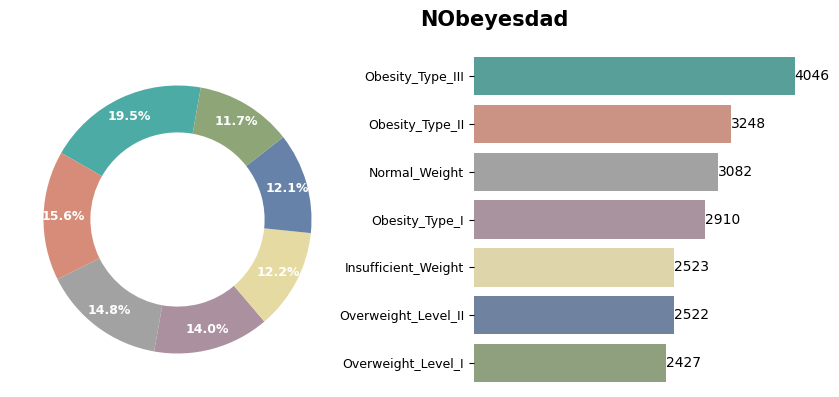

In [30]:
showplot("NObeyesdad")

In [31]:
df = pd.DataFrame(df_train.describe(include='all').transpose())
df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.0,NaN,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
